<a href="https://colab.research.google.com/github/CamaraTinah/test_compendium/blob/main/TP/TP_1_GIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titre du TP : Introduction à la Classification d'Images satellitaires avec les Réseaux Neuronaux Convolutifs (CNN)**

**Description :**

Dans ce TP, nous explorerons les concepts fondamentaux liés à la classification d'images en utilisant des Réseaux Neuronaux Convolutifs (CNN). Notre objectif principal sera de catégoriser des images satellites en fonction du type de terrain.



**Étapes du TP :**

Dans ce TP nous allons apprendre à manipuler un réseau de neurones convolutionnel pour une tache de classification afin catégoriser des d'images satellites en fonction du type de terrain.

Nous allons progresser en suivant les étapes suivantes :

**Partie 1 :** Préparation de l'environnement de travail

1. **Bibliothéques Deep Leraning :** Utilisation de la libraire `fastai`
2. **Données images :** Utilisation d'images EuroSAT RGB

**Partie 2 :** Appropriation

1. **Utiliser un modèle Deep-Learning pré-entrainé** :  Apprendre (1) à charger un modèle de réseau de neurones existant et (2) à exécuter une tache de classification sur une images de notre choix téléchargée.

2. **Manipuler un dataset** : Apprendre (1) à charger un dataset d'images dans depuis le disque pour entrainer un modèle ; (2) Savoir comment explorer les données d'un dataset.

3. **Voir la structure d'un modèle** :  Apprendre (1) à créer lun modèle basé sur une architecture type (resnet50) et (2) à visualiser toutes les couches du réseau avec leurs détails.

4. **Entrainer un modèle**  Apprendre (1) à réaliser une phase d'apprentissage d'un modèle ; (2) comprendre comment sauvegarder un modèle avec ces paramètres d'apprentissage ; (3) apprendre à visualiser la précision de prédiction de notre modèle et enfin (4) voir comment examiner les résultats et les erreurs du modèle.

**Partie 3 :** Réalisation

1. **Classifier une photo satellitaire choisie** :
Trouver une photo satellitaire de la Réunion, telecharger là et utiliser notre modèle pour la classifier.

2. **Enrichir un modèle** :
Enrichir les classes du modèle pour prendre en considération d'autres types de terrain.

3. **Bonus avec pytorch** :
Pour les étudiants avancés, reproduire les élements de ce TP avec la bibliothèque `pytorch` qui necessite un peu plus d'entrer dans l'architecture du réseau de neurones.

---




# *Préparation du TP :*

### 1. Bibliothéques Deep Leraning :
Dans ce TP nous allons utiliser la bibliothèque **`fastai`** qui est une bibliothèque de programmation en Python qui simplifie l'utilisation des techniques de Deep Learning. Elle est construite sur le framework PyTorch, une autre bibliothèque de machine learning populaire de plus bas niveau.

Commençons par importer cette librairie :

In [1]:
import fastai

### 2. Données images :

Dans ce TP, nous utiliserons les images EuroSAT RGB depuis le site web du DKFI (Centre de recherche allemand spécialisé dans l'intelligence artificielle)
Les images sont compressées dans un fichier zip.

In [2]:
from fastai.vision.all import untar_data, Path
path = untar_data('http://madm.dfki.de/files/sentinel/EuroSAT.zip')
Path.BASE_PATH = path

Voyons les images EuroSAT RGB à disposition pour ce TP : On constate que les images sont organisées dans des répertoires en fonction de ce qu'elle représente (leur étiquette).

In [3]:
print(path.ls())
print((path / 'HerbaceousVegetation').ls()[:10])

images = list(path.rglob("*.jpg"))
print(len(images))

[Path('Forest'), Path('PermanentCrop'), Path('Industrial'), Path('Pasture'), Path('AnnualCrop'), Path('HerbaceousVegetation'), Path('Residential'), Path('River'), Path('Highway'), Path('SeaLake')]
[Path('HerbaceousVegetation/HerbaceousVegetation_1452.jpg'), Path('HerbaceousVegetation/HerbaceousVegetation_2370.jpg'), Path('HerbaceousVegetation/HerbaceousVegetation_1322.jpg'), Path('HerbaceousVegetation/HerbaceousVegetation_2360.jpg'), Path('HerbaceousVegetation/HerbaceousVegetation_748.jpg'), Path('HerbaceousVegetation/HerbaceousVegetation_2684.jpg'), Path('HerbaceousVegetation/HerbaceousVegetation_321.jpg'), Path('HerbaceousVegetation/HerbaceousVegetation_2844.jpg'), Path('HerbaceousVegetation/HerbaceousVegetation_1727.jpg'), Path('HerbaceousVegetation/HerbaceousVegetation_2420.jpg')]
27000


# *Partie 2 du TP: Appropriation*
## 1. **Utiliser un modèle Deep-Learning pré-entraîné**

Dans un premier temps on va voir comment avec la librairie `fastai`, il est possible d'utiliser un modèle déjà entrainé pour une tache bien spécifique de classification.

En effet, il se peut que vous disposiez d'un modèle pré-entrainé ayant atteint un bon niveau de qualité de prédiction et que vous souhaitez l'utiliser directement pour analyser des images satellites et les classifier rapidement.

Pour cela dans cette section nous allons :
1. Apprendre à charger un modèle de reseau de neurones existant
2. Télécharger une image à traiter (à classifier)
2. Apprendre à exécuter une tache de classification sur l'image

### 1.1. Charger un modèle pré-entraîné

Nous téléchargeons depuis github un fichier nommé `two_classes_model.pkl` contenant un modèle entrainé.  
Pour cela, nous utilisons la commande `wget`.  
Ce ficher contient le modèle entraîné pour classer des images satellites en fonction de deux types de terrain: **Nature** ou **Humain**.

In [4]:
!wget https://github.com/courdier/ia/raw/main/TP/pretrained_models/two_classes_model.pkl
!wget https://github.com/courdier/ia/raw/main/TP/pretrained_models/two_classes_model.py

--2024-11-20 17:28:58--  https://github.com/courdier/ia/raw/main/TP/pretrained_models/two_classes_model.pkl
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/courdier/ia/main/TP/pretrained_models/two_classes_model.pkl [following]
--2024-11-20 17:28:59--  https://raw.githubusercontent.com/courdier/ia/main/TP/pretrained_models/two_classes_model.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 103309010 (99M) [application/octet-stream]
Saving to: ‘two_classes_model.pkl’

two_classes_model.p 100%[===================>]  98.52M   361MB/s    in 0.3s    

2024-11-20 17:29:09 (361 MB/s) - ‘two_class

Pour charger ce modèle, on utilise la fonction `load_learner`de `fastai`.

**Note :** *Un fichier pickle ".pkl" est un format en Python qui permet de sauvegarder des objets Python complets (sérialisation).*

In [5]:
from fastai.vision.all import load_learner
from two_classes_model import *
model = load_learner('two_classes_model.pkl')

### 1.2. Ouvrir une image à traiter


 Choisissons parmis nos données du TP définies plus haut l'image à traiter.<br>
 Il s'agira en l'occurence d'une image de végétation.


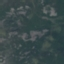

In [6]:
from PIL import Image

image = Image.open(path/'HerbaceousVegetation/HerbaceousVegetation_450.jpg')
image

### 1.4. Exécuter une tache de classification sur l'image
Appliquons notre modèle sur cette image pour voir s'il permet d'identifier correctement la classe de notre image.
Pour cela, nous allons appeler la méthode `predict(image)` sur notre modèle.

Les résultats de la prédiction sont stockés dans trois variables :
* `pred` :     La classe identifiée.
* `pred_idx` : L'indice de la classe indentifiée.
* `probs` :    Les probabilités associées à chaque classe.

In [7]:
# Réalisatin de la prédiction en utilisant le modèle (model) sur une image donnée (image).
pred,pred_idx,probs = model.predict(image)

# Affichage de la classe identifiée et la probabilité associée
f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

'Prediction: Nature; Probability: 0.9805'

### 1.5. Discussion

Un modèle pre-entrainé peut ne pas correspondre totalement à notre attente spécifique. Il est parfois nécessaire d'affiner un modèle déjà pré-entrainer avec notre propre jeu de données pour augmenter la qualité de ses prédictions.

## **2. Manipuler un dataset**

Le Dataset correspond aux données initailes nécessaire, ces données sont  le point de départ de tout algorithme de Machine Learning.  
C'est autant la qualité que la quantité des données qui est importante.

Dans cette section nous allons :

1. Voir comment télécharger un dataset d'images ;
2. Apprendre à creer un dataloader qui est une structures de données organisant le dataset dans fastai;
3. Savoir comment explorer les données de ce dataset.

### 2.1 Téléchargement des données

Cette opération a été réalisée dans la partie préparation du TP.

### 2.2 Création du dataloader pour organiser les données du dataset avec fastai

Le `Dataloader` est un objet qui permet de charger et organiser les données qui constituent le dataset. <BR>Ce dataloader sera utilisée pour entrainer le modèle.

Il permet de :
- charger les données en parallèle (et non sequentiellement)
- créer un batch de données (un ensemble de données qui seront traitées en même temps par le modèle)
- mélanger les données aléatoirement
- appliquer des transformations sur les données, par exemple pour les mettre dans le bon format

Dans `fastai`, le dataloader est créé à partir d'un objet appelé `DataBlock`, qui permet de définir comment les données sont chargées et transformées.

In [8]:
# Importation des modules nécessaires de fastai
from fastai.vision.all import DataBlock, ImageBlock, CategoryBlock, RandomSplitter, RegexLabeller
from fastai.vision.all import get_image_files, using_attr, aug_transforms

# La fonction label_func prend en paramètre le nom d'un fichier (fname) et retourne le label associé ('Nature' ou 'Human') en fonction des classes spécifiées.
def label_func(fname):
    # Liste des classes appartenant à "zones naturelles"
    nature_classes = ['Forest', 'River', 'AnnualCrop', 'HerbaceousVegetation', 'PermanentCrop', 'SeaLake', 'Pasture']
    # Vérifie si le nom du fichier contient l'une des classes de nature
    if any(nc in fname.name for nc in nature_classes):
        return 'Nature'
    else:
        return 'Human'

# Définition d'un objet blocks de type DataBlock
blocks = DataBlock(
  blocks = (ImageBlock, CategoryBlock),               # spécifie les types de blocs de données à utiliser
  get_items = get_image_files,                        # définit la fonction qui va récupérer les fichiers images
  splitter = RandomSplitter(valid_pct=0.2, seed=0),   # définit la fonction qui va séparer les données en train et valid
  get_y = label_func,                                 # définit la fonction qui va extraire les labels des données
  batch_tfms = aug_transforms(mult=2)                 # définit la fonction qui augmente la diversité des données.
)

# Création du data loader
# Cet objet dataloader contient les données prétraitées prêtes à être utilisées dans un modèle d'apprentissage automatique.
dataloader = blocks.dataloaders(path)

# Affichage de la taille des ensembles d'entraînement et de validation
len(dataloader.train_ds), len(dataloader.valid_ds)

(21600, 5400)

Détails des arguments:

- `blocks = (ImageBlock, CategoryBlock)` :
Cela spécifie les types de blocs de données à utiliser. Dans ce cas, il y a deux blocs : `ImageBlock` pour les données d'image et `CategoryBlock` pour les données de catégorie (étiquettes).

- `get_items = get_image_files` :
Cela définit la fonction qui sera utilisée pour récupérer les données. `get_image_files` est une fonction qui extrait les chemins des fichiers d'images à partir d'un répertoire donné.

- `splitter = RandomSplitter(valid_pct=0.2, seed=0)` :
Cela définit la fonction qui sépare les données en ensembles d'entraînement et de validation. Dans ce cas, `RandomSplitter` est utilisé pour diviser les données de manière aléatoire. `valid_pct=0.2` indique que 20 % des données seront réservées pour l'ensemble de validation, et seed=0 définit la seed utilisée pour la reproductibilité. (Une seed est un nombre utilisé pour l'initialisation d'un générateur de nombres pseudo-aléatoires).

- `get_y = label_func` :
Cela définit la fonction qui extrait les étiquettes (labels) à partir des noms de fichiers d'images.

- `batch_tfms = aug_transforms(mult=2)` :
Cela définit les transformations à appliquer sur les données en mini-lots (batches) lors de l'entraînement. `aug_transforms` spécifie que l'on va appliquer des "augmentations de données" qui vont modifier legèrement les images de l'ensemble d'entrainement, ce qui est souvent utile pour améliorer la généralisation du modèle.

### 2.3 Exploration des données
Affichage d'une grille d'échantillons d'images du jeu de données avec leurs étiquettes associées. Chaque cellule de la grille contiendra une image, et la grille sera composée de deux lignes et cinq colonnes.

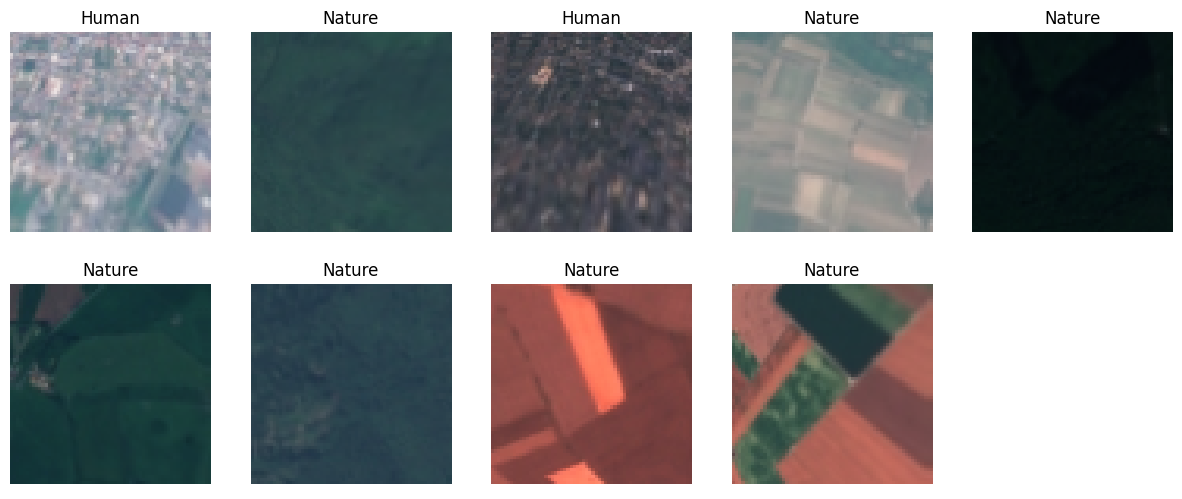

In [9]:
dataloader.show_batch(nrows=2, ncols=5)

La ligne de code suivante démontre comment `aug_transforms` enrichit les données. Elle affiche une image de l'ensemble d'entraînement, révélant de multiples possibles augmentations que peut réaliser par le dataloader.

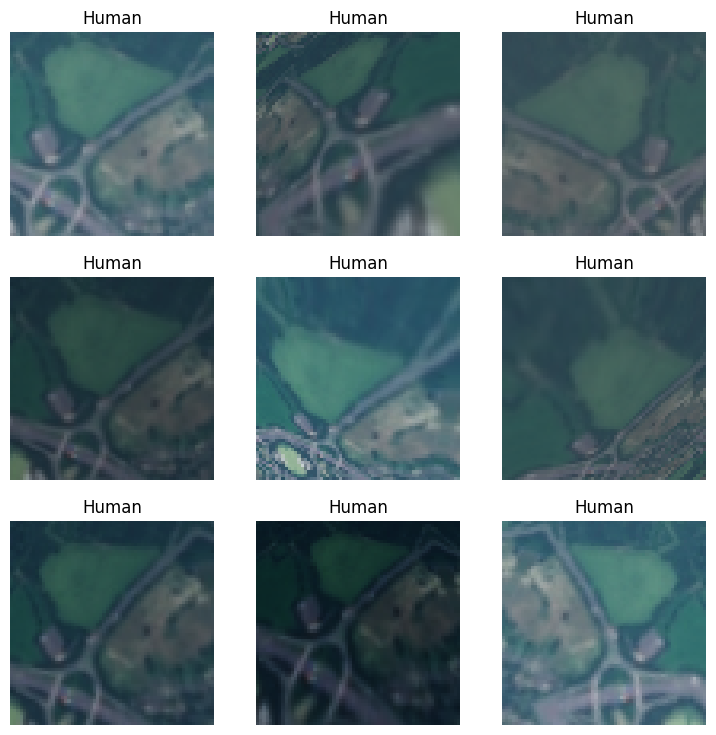

In [10]:
dataloader.train.show_batch(nrows=3, unique=True)

## **3. Structure d'un modèle**  

Maintenant que nous avons notre structure de dataset, nous allons créer le réseau de neurones sur lequel nous allons réaliser l'entrainement.

Dans cette section, nous allons :

1. Apprendre à créer un modèle basé sur une architecture type (resnet50)
2. Apprendre à visualiser toutes les couches du réseau avec leurs détails.

### 3.1. Création du modèle basé sur une architecture type

Nous allons utiliser la fonction `vision_learner` de `fastai` pour creer le modele en lui demandant une architecture de type `resnet50`.

In [11]:
from fastai.vision.all import vision_learner, resnet50, accuracy

model = vision_learner(dataloader, resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 104MB/s]


### 3.2. Visualisation de toutes les couches du réseau avec leurs détails.

Il est possible de voir la constitution du modèle grâce à la fonction `model.summary()`.

In [12]:
model.summary()

Sequential (Input shape: 64 x 3 x 64 x 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 32 x 32   
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 16 x 16   
MaxPool2d                                                      
Conv2d                                    4096       False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
____________________________________________________________________________
                     64 x 256 x 16 x 16  
Conv2d                                    16384      False     
BatchNorm2d                          

Première partie de l'architecture :

**Entrée (Input shape: 64 x 3 x 64 x 64) :**
* Le batch d'entrée est de taille 64.
* Il a 3 canaux (pour une image RGB).
* La taille de chaque image est de 64x64 pixels.

**Bloc 1 :**
* Conv2d: Couche de convolution avec 64 filtres, chaque image en sortie du bloc est de taille 32x32.
* BatchNorm2d: Normalisation par lot pour les 64 canaux. Permet d'accélérer la convergence et d'améliorer la stabilité du modèle.
* ReLU: Fonction d'activation ReLU -> introduction de la non-linéarité

**...**

La dernière partie de l'architecture décrit le processus de classification finale :

**Bloc Adaptive Average Pooling et Adaptive Max Pooling**

* Adaptive Average Pooling et Adaptive Max Pooling : ces fonctions calculent la moyenne et le maximum des valeurs sur les dimensions spatiales, pour réduire les dimensions spatiales de la sortie de (64 x 2048 x 2 x 2) à 64 x 2048 x 1 x 1.

**Bloc d'applatissement des couches et de normalisation**

L'aplatissement et les couches de normalisation par lot et de dropout fournissent une représentation plate et régularisée qui peut être utilisée pour la classification finale.
* Flatten est utilisé pour convertir les données en un format unidimensionnel. ici elle transforme la forme 64 x 2048 x 1 x 1 en une forme plate de 64 x 4096.
* BatchNorm1d: Normalisation par lot pour les 4096 sorties après l'aplatissement. Permet d'accélérer la convergence et d'améliorer la stabilité du modèle.
* Dropout: Couche de régularisation on ignore certaines sorties de neurones pour prévenir le surapprentissage.

**Couche entièrement connectée (Fully Connected Layer) :**
* Linear: Couche linéaire avec 512 sorties.
* ReLU: Fonction d'activation ReLU.
* BatchNorm1d: Normalisation par lot pour les 512 sorties.
* Dropout: Couche de dropout pour régularisation.

**Couche de sortie :**
* Linear: Couche linéaire avec 10 sorties pour les 10 classes de notre tâche de classification.

**Modèle avec partie figées pendant l'entraînement :**

>Avec **Fastai**, lorsque vous créez un modèle en utilisant la fonction `vision_learner`, le comportement par défaut est de charger un modèle pré-entrainé et de geler toutes les couches sauf les couches de classification finales.
Cela signifie que les poids pré-entraînés du modèle, dans notre cas le resnet50, restent figés. Seuls les poids des couches de classification finales sont mis à jour pendant l'entraînement.

**La section "Total params" :**
>Remarquez à la fin le nombre de paramètres entrainables : La section "Total params" donne le nombre total de paramètres dans le réseau ; **plus de 25 millions** (25 619 520) et le nombre de paramètres entraînables ; un peu plus de 2 millions (2 164 608). Ce nombre de paramètre confirme que le modèle resnet50 utilisé ici est bien un réseau profond.

On voit bien ici par élémenst que la plus grande partie des paramètres de notre modèle sont figés. Il s'agit d'une pratique courante lorsque l'on fait du "**fine-tuning**", c'est-à-dire lorsque que l'on réutilise des modèles pré-entraîné sur une tâche similaire à celle que l'on veut réaliser sur nos données.



Pour examiner en détail le modèle sous-jacent dans `PyTorch`, on peut employer la commande `model.model`.
Cette méthode offre un aperçu plus approfondi que `model.summary()`, car elle détaille la structure interne du modèle, permettant ainsi une meilleure compréhension de l'agencement et de la fonctionnalité de ses différentes couches.

In [13]:
model.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

## **4. Entrainer un modèle**

Maintenant que nous avons un dataset et un modèle de réseau de neurones nous pouvons passer à la phase d'entrainement du modèle.
Cette phase d'entraînement implique l'ajustement itératif des poids du réseau pour minimiser une fonction de coût.

Dans cette section nous allons :

1. Apprendre à réaliser une phase d'apprentissage d'un modèle ;
2. Voir comment sauvegarder un modèle avec ces paramètres d'apprentissage ;
3. Apprendre à visualiser la précision de prédiction de notre modèle
4. Comprendre comment examiner les résultats et les erreurs du modèle.

### 4.1. La phase d'apprentissage

Il suffit d'appeler la fonction `fine_tune` du modèle pour lancer l'apprentissage.

La fonction prend en paramètre le nombre d'*epoch* à faire.  
Une *epoch* correspond à une passe à travers tout le dataset, c'est-à-dire au fait que le modèle a utilisé une fois toutes les images du dataset..

In [14]:
model.fine_tune(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.343776,0.218144,0.920000,00:54


epoch,train_loss,valid_loss,accuracy,time
0,0.142038,0.070066,0.978519,00:56
1,0.088417,0.035058,0.989815,00:58
2,0.062766,0.036918,0.989259,00:58


Analyse de cette sortie

* **Epoch** : Une époque représente une itération complète à travers l'ensemble de données d'entraînement.
* **train_loss** : La perte (loss) sur l'ensemble d'entraînement à la fin de chaque époque. Il mesure à quel point les prédictions du modèle diffèrent des vraies étiquettes pour les données d'entraînement. Une diminution de cette valeur indique une amélioration du modèle.
Cette loss est utilisée durant le training pour calculer les gradients et améliorer le modèle.
* **valid_loss** : Similaire à train_loss mais calculé sur l'ensemble de validation.
* **accuracy** : La précision (accuracy) sur l'ensemble de validation à la fin de chaque époque. Il représente la proportion correcte de prédictions par rapport au nombre total d'images dans l'ensemble de validation.
* **time** : Le temps écoulé pendant cette époque d'entraînement.

### 4.2. Sauvegarde de notre modèle avec ces paramètres d'apprentissage

Vous pouvez sauvegarder le modele en utilisant la fonction `export`:

In [15]:
model.export("model.pkl")

Une fois le modèle sauvegardé vous pourrez l'importer à partir du fichier exporté pour effectuer des prédictions sans avoir à le ré-entraîner à chaque fois. Pour cela, vous pouvez utiliser la fonction `model = load_learner('model.pkl')`.

### 4.3. Visualiser la précision de prédiction de notre modèle

**fastia** fournit un recorder, sorte d'enregistreur qui stocke différentes métriques et informations pendant l'entraînement du modèle.
On peut afficher la courbe d'évolution de l'accuracy (la précision) en utilisant ce code :

* L(...) est une construction de liste dans Fastai, qui est souvent utilisée pour créer une liste à partir d'une séquence (dans ce cas, probablement une liste ou un tableau).

* itemgot(2) est une méthode de liste qui extrait l'élément à l'index 2 de chaque élément de la liste. l'index 2 de la liste construite par le recordeur  est ici associé à la précision (accuracy).


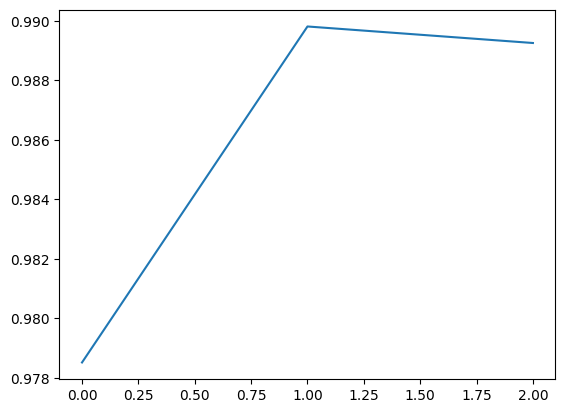

In [16]:
from fastai.vision.all import plt, L

accuracy_values = L(model.recorder.values).itemgot(2)
plt.plot(accuracy_values);

### 4.4. Examiner les résultats et les erreurs du modèle

Pour comprendre le type d'erreur que notre modèle fait, nous pouvons utiliser ce que l'on appelle une **matrice de confusion**. Celle-ci montre combien d'images d'une classe donnée ont été mal classifiées dans chacune des autres classes.

En effet, il est connu par exemple que la réponse spectrale des rivières (eaux troubles) et des routes est assez similaire notablement dans le spectre visible, puisqu'ils absorbent une grande partie du rayonnement solaire.  
Vu de loin, dans une zone de 640 m x 640 m, une rivière et une autoroute peuvent donc être confondues. Par conséquent, il ne serait pas surprenant que certaines images de rivières et de routes soient incorrectement classifiées, signifiant qu'une image de rivière pourrait être interprétée comme celle d'une route et inversement par notre modèle.

Nous utilisons la matrice de confusion calculée sur les données de validation pour identifier les classes où des erreurs de classification se sont produites.
Cette  matrice montre le nombre d'échantillons correctement classés (diagonale principale) et les erreurs de classification pour chaque classe

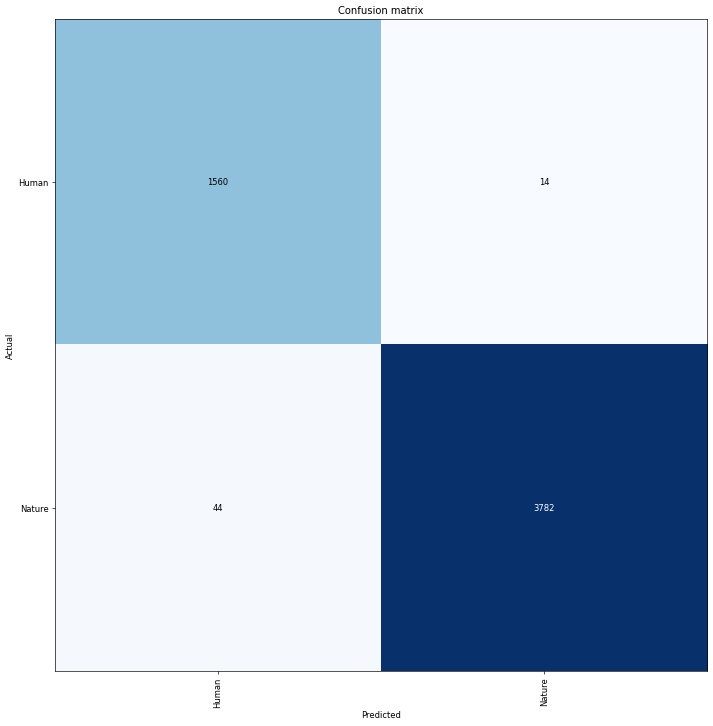

In [17]:
from fastai.vision.all import ClassificationInterpretation

interpretation = ClassificationInterpretation.from_learner(model)
interpretation.plot_confusion_matrix(figsize=(12,12), dpi=60)

Nous pouvons utiliser la fonction `most_confused` pour voir quelles sont les erreurs les plus fréquentes de notre modèle.

In [18]:
interpretation.most_confused(min_val=5)

[('Nature', 'Human', 44), ('Human', 'Nature', 14)]

# *Partie 3 du TP: Réalisation*

## 3.1. **Classifier une image satellitaire choisie**


### **Exercice 1 :** Utiliser notre modèle avec vos propres images

Il vous est demandé ici :

1. de trouver quelques photos satellitaires  
sur lesquels nous pourrons appliquer notre modèle de classification.

2. d'écrire le code python permettant de choisir et télécharger une image à traiter. <BR>
Pour cela, utilisez l'utilitaire `widget` définie dans `fastai.vision.widgets` et qui permet le téléchargement d'une image avec l'instruction `widgets.FileUpload()`.

3. D'appliquer notre modèle à cette image

In [4]:
# Importation des modules nécessaires
from fastai.vision.widgets import FileUpload

# Création du widget pour importer un fichier
im = FileUpload()
display(im)

FileUpload(value={}, description='Upload')

In [6]:
#visualisation de l'image
from fastai.vision.all import PILImage
image = PILImage.create(im.data[-1])
image


## 3.2. **Enrichir un modèle : Enrichir les classes du modèle pour prendre en considération d'autres types de terrain.**

### **Exercice 2.** Enrichir ce modèle en affinant les classes à détecter **

Notre modèle a été pré-entrainé pour caractériser des images dans les classes :
- Nature
- Humain

Il vous est demandé de pouv oir maintenant considérer les classes suivantes :
  - Forest,
  - River,
  - AnnualCrop,
  - HerbaceousVegetation,
  - Residential,
  - PermanentCrop,
  - Industrial,
  - SeaLake,
  - Pasture,
  - Highway

  Pour cela :
  
  **a)** Définissez une nouvelle fonction d'extraction des labels de données applicable au dataset des images EuroSAT,  
  **b)** Testez en montrant que votre dataloader a bien étiqueté vos images de votre dataset.


In [20]:
# Votre code pour l'exercice 2. ici ...

### **Exercice 3.** Entrainement de votre modéle, test avec vos images et analyse des résultats

  Pour cela inspirez vous de la partie 2 du TP.

In [21]:
# Votre code pour l'exercice 3. ici ...

# *Partie 4 du TP : Bonus*

Pour les étudiants avancés, reproduire les élements de ce TP avec la bibliothèque PyTorch qui nécessite un peu plus de rentrer dans les détails de l'entrainement du réseau de neurones.

Pytorch permet d'avoir plus de flexibilité dans l'entraînement, et de nombreux choix de design ne sont pas fait par défaut et nous reviennent.

In [22]:
# Votre code pour l'exercice "bonus" ici ...

---

<center>

<img src="http://lim.univ-reunion.fr/staff/courdier/media/home_media/CC_BY_4_0.jpeg" width="5%">

</center>

---